# MAdaLine
In MRI Algorithm only the weights and biases for the hidden AdaLines are adjusted. The weights for the output unit are fixed.
<img src="images/Q4-LearningAlgorithm-Pt1.png">
<img src="images/Q4-LearningAlgorithm-Pt2.png">

## Model Architecture

The input of our neuron is x and y so we need 2 neurons as input. And we need 6 lines to separate 3 different regions thus we need 6 neurons in the hidden layer. There are 3 distinctive classes we should classify so we need 2 output neurons.

<img src="images/Q4-ModelArch.png" width = 500>

The boolean function of neuron A and B is:

$f_{A}(h_1,h_2,h_3) = \overline{h_1}.\overline{h_2}.{h_3} \$

$f_{B}(h_4,h_5,h_6) = \overline{h_6}.\overline{h_7}.{h_8} \$

The weights and biases of these two output neurons are learned separately using AdaLine's Learning Algorithm.

## Making the Dataset

In [65]:
import numpy as np
import pandas as pd
def make_points(x_mean,x_sd,y_mean,y_sd,size):
    x1 = np.random.normal(x_mean, x_sd, size).reshape(-1,1)
    y1 = np.random.normal(y_mean, y_sd, size).reshape(-1,1)
    d = pd.DataFrame(np.concatenate((x1, y1), axis=1), columns=['x','y'])
    return d

A = make_points(3,0.5,0,0.5,100)
A['label'] = 'A'
B = make_points(0,0.5,0,0.5,100)
B['label'] = 'B'

In [66]:
import math
from matplotlib import pyplot as plt
from random import uniform


from math import sin, cos, radians, pi, sqrt

def meteorites():
    angle = uniform(0, 2 * pi)  # in radians
    distance = sqrt(uniform(16, 36))
    return distance * cos(angle), distance * sin(angle)

x = np.zeros(250)
y = np.zeros(250)
for i in range(250):
    x[i], y[i] = meteorites()
    x[i] += 1.5
#     y[i] += 5

C = pd.DataFrame(np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1), columns=['x','y'])
C['label'] = 'C'

df = pd.concat([C,A,B], axis = 0)

In [67]:
onehot_encoding = pd.get_dummies(df['label'])
df = pd.concat([df,onehot_encoding], axis = 1).drop('C',axis = 1)

df['A'] = df['A'].replace({0:-1,1:1})
df['B'] = df['B'].replace({0:-1,1:1})

df

,x,y,label,A,B
0,-1.300830,4.748062,C,-1,-1
1,-2.547187,0.589953,C,-1,-1
2,5.367129,-1.066812,C,-1,-1
3,-4.183842,0.265129,C,-1,-1
4,6.079257,-1.066959,C,-1,-1
...,...,...,...,...,...
95,0.314814,0.618908,B,-1,1
96,-0.414498,-0.797214,B,-1,1
97,-0.280091,-0.299688,B,-1,1
98,0.373647,0.002622,B,-1,1


### Plotting the Dataset

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

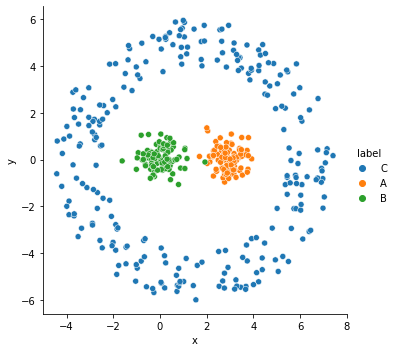

In [69]:
sns.relplot(x="x", y="y", hue="label", data=df);

## Calculating the output weights & biases

In [70]:
import numpy as np
import pandas as pd
class AdaLineNetwork() :
    
    def __init__(self, in_features, out_features, seed = 42) :
        #Seed
        np.random.seed(seed)

        self.in_features = in_features
        self.out_features = out_features
        # Initialize Weights & Biases
        self.init_wad()
        
    # Initialize Weights & Biases
    def init_wad(self) :
        self.weights = np.random.uniform(low=-1, high=1, size=(self.in_features*self.out_features,)).reshape(self.out_features,-1)
        self.biases = np.random.uniform(low=-1, high=1, size=(self.out_features,))
        
        #Learning Rate
        self.lr = 0.1
        
    def h(self,num) :
        if num >= 0 :
            return 1
        else :
            return -1
    def forward(self, x) :
        net = np.matmul(self.weights,x)+self.biases
        prediction = pd.Series(np.matmul(self.weights,x)+self.biases)
        prediction = prediction.apply(self.h).values
        return prediction,net
    
    def backward(self,t, net, xi) :
        self.weights = self.weights + self.lr*(t-net)*xi
        self.biases = self.biases + self.lr*(t-net)
        
    def train(self,df,epochs = 1) :
        error_per_epoch = []
        for epoch in range(0,epochs):
            # Evaluate
            error_per_epoch.append(self.evaluate(df))
            
            for index, row in df.iterrows():
                # Forward Propagation
                prediction,net = self.forward(row.drop('label').values)
                # Backpropagation
                self.backward(row['label'],net,row.drop('label').values)
        
        return error_per_epoch
                
    def calc_error(self,target,net) :
        return (np.square(target-net)/2)
    
    def evaluate(self,df) :
        error = 0
        for index, row in df.iterrows():
            #Forward Propagation
            t,net = self.forward(row.drop('label').values)
            error += model.calc_error(t,net)[0]
        
        return error
    
    def predict(self,df) :
        result = []
        for index, row in df.iterrows() :
            target,net =  self.forward(row.drop('label').values)
            result.append(target[0])
        
        return result
            

In [71]:
in_features = 3
out_features = 1
model = AdaLineNetwork(in_features, out_features)
print(model.weights)
print(model.biases)

[[-0.25091976  0.90142861  0.46398788]]
[0.19731697]


In [72]:
train_custom_gate = pd.read_csv('CustomGate.csv')
train_custom_gate

,x,y,z,label
0,1,1,1,-1
1,1,1,-1,-1
2,1,-1,1,-1
3,1,-1,-1,-1
4,-1,1,1,-1
5,-1,1,-1,-1
6,-1,-1,1,1
7,-1,-1,-1,-1


In [73]:
epochs_ = 50
loss_per_epoch = model.train(train_custom_gate, epochs = epochs_)

In [74]:
output_weights = model.weights
output_bias = model.biases
print(model.weights)
print(model.biases)

[[-0.24242424 -0.27367424  0.35132576]]
[-0.75]


In [75]:
from sklearn.metrics import classification_report
y_pred = model.predict(train_custom_gate)
y_true = train_custom_gate['label'].values
print(classification_report(y_true, y_pred, labels=[-1,1]))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## MAdaLine Implementation

In [242]:
class AdaLine() :
    
    def __init__(self, in_features, out_features,weights = None,biases = None, seed = 42) :
        #Seed
        np.random.seed(seed)

        self.in_features = in_features
        self.out_features = out_features
        # Initialize Weights & Biases
        if weights is None:
            self.init_wad()
        else :
            self.weights = weights
            self.biases = biases
            
    def h(self,num) :
        if num >= 0 :
            return 1
        else :
            return -1
    # Initialize Weights & Biases
    def init_wad(self) :
        self.weights = np.random.uniform(low=-1, high=1, size=(self.in_features*self.out_features)).reshape(-1,out_features)
        self.biases = np.random.uniform(low=-1, high=1, size=(self.out_features,)).reshape(-1,1)

        #Learning Rate
        self.lr = 0.1
    
    def forward(self, x) :
        net = np.matmul(self.weights,x)+self.biases
        prediction = pd.Series(net.flatten())
        prediction = prediction.apply(self.h).values.reshape(-1,1)
        return prediction,net

In [243]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx,array[idx]

In [315]:
import numpy as np
import pandas as pd
class MAdaLineNetwork() :
    
    def __init__(self, in_features,hidden_neurons, out_features,output_weights,output_biases, seed = 42) :
        #Seed
        np.random.seed(seed)

        self.in_features = in_features
        self.hidden_neurons = hidden_neurons
        self.out_features = out_features
        self.output_weights = output_weights
        self.output_biases = output_biases
        
        self.first_layer = AdaLine(in_features,hidden_neurons)
        self.last_layer = AdaLine(hidden_neurons,out_features,output_weights,output_biases)

        self.lr = 0.1

    def forward(self,x) :
        predictions1, net1 = self.first_layer.forward(x)
        predictions2, net2 = self.last_layer.forward(predictions1.reshape(-1,1))
        return predictions2,net2,net1
    
    def train(self,df,epochs) :
        for e in range(0,epochs) :
            for index, row in df.iterrows() :

                # Forward Propagation
                x = np.array(row[['x','y']].values).reshape(-1,1)
                prediction2, net2, net1 = self.forward(x)
                # Back Propagation
                self.backward(row[['A','B']].values,x,prediction2,net1)
    

    def backward(self,y_true,x,prediction2,net1) :
        index = 0
        for pred in prediction2 :
            # Don't update the weights if the output was current
            if y_true[index] == pred:
                index += 1
                continue
            else :
                if y_true[index] == 1:
                    self.update_wab_for_positive_1(x,net1)
                else :
                    self.update_wab_for_negative_1(x,net1)
                index += 1
        
        
    
    def update_wab_for_positive_1(self,x,net1):
        idx, net_i = find_nearest(net1,0)

        old_weights = self.first_layer.weights[idx]
        old_biases = self.first_layer.biases[idx]
        
        new_weights = old_weights + self.lr*(1+(-1)*net_i[0])*x.reshape(1,2)
        new_biases = old_biases + self.lr*(1+(-1)*net_i[0])

        # print(old_weights)
        self.first_layer.weights[idx] = new_weights
        self.first_layer.biases[idx] = new_biases
        # print(new_weights)
        # print('-------')
    
    def update_wab_for_negative_1(self,x,net1):
        index = 0
        for n in np.nditer(net1):
            if n > 0 :
                old_weights = self.first_layer.weights[index]
                old_biases = self.first_layer.biases[index]
                
                new_weights = old_weights + self.lr*(-1+(-1)*n)*x.reshape(1,2)
                new_biases = old_biases + self.lr*(-1+(-1)*n)

                # print(old_weights)
                self.first_layer.weights[index] = new_weights
                self.first_layer.biases[index] = new_biases

                # print(new_weights)
                # print('-------')
                index += 1
            else:
                index += 1
                continue
        


In [316]:
in_features = 2
hidden_neurons = 6
out_features = 2
output_weights_ = np.concatenate((np.concatenate((output_weights,np.array([0,0,0]).reshape(1, 3)), axis=1), np.concatenate((np.array([0,0,0]).reshape(1, 3), output_weights), axis=1)), axis=0).reshape(-1,6)
output_biases_ = np.concatenate((output_bias, output_bias), axis=0).reshape(-1,1)
madaline_model = MAdaLineNetwork(in_features,hidden_neurons, out_features,output_weights_,output_biases_)

In [317]:
# pred2, n2, n1 = madaline_model.forward(np.array([1,2]).reshape(-1,1))

# # find_nearest(n1,0)
# n1

print(madaline_model.first_layer.weights)

[[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]
 [-0.68796272 -0.68801096]
 [-0.88383278  0.73235229]
 [ 0.20223002  0.41614516]
 [-0.95883101  0.9398197 ]]


In [318]:
madaline_model.train(df.drop('label',axis = 1),epochs = 10)

In [319]:
print(madaline_model.first_layer.weights)

[[2.38878959e-01 5.14709600e-01]
 [1.07755564e-01 2.38686290e-01]
 [4.05923877e-01 8.27915287e-01]
 [1.44900808e-01 5.13495918e-01]
 [9.54353218e-14 2.72961186e-13]
 [3.46079633e-01 7.42024558e-01]]


In [88]:
df

,x,y,label,A,B
0,-1.300830,4.748062,C,-1,-1
1,-2.547187,0.589953,C,-1,-1
2,5.367129,-1.066812,C,-1,-1
3,-4.183842,0.265129,C,-1,-1
4,6.079257,-1.066959,C,-1,-1
...,...,...,...,...,...
95,0.314814,0.618908,B,-1,1
96,-0.414498,-0.797214,B,-1,1
97,-0.280091,-0.299688,B,-1,1
98,0.373647,0.002622,B,-1,1
